In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from random import shuffle 

import glob
import os
import shutil

In [6]:
from tqdm.notebook import tqdm

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

### data import


In [8]:
import pathlib

In [20]:
data_dir = pathlib.Path("/Users/j/Desktop/programming/ML/github/image_recognition/dogs vs cats datasets/Data/train")
print(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])
print(CLASS_NAMES)


# The 1./255 is to convert from uint8 to float32 in range [0,1]. Better for d\feeding to a neural net
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



BATCH_SIZE = 32
#  Batch Sixe is how many images are we feeding in on one batch. It can be set to none. It is important to set it
# to optimise computing power
IMG_HEIGHT = 50
IMG_WIDTH = 50
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
#  here class_mode='binary' is imp because it creates an output of [0,1] rather than [dog,cat]

/Users/j/Desktop/programming/ML/github/image_recognition/dogs vs cats datasets/Data/train
25000
['cat' 'dog']
Found 25000 images belonging to 2 classes.


### creating the model

In [21]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [24]:
total_train = image_count
batch_size = 128
epochs = 15

In [25]:
# history = model.fit_generator(
#     train_data_gen,
#     steps_per_epoch=total_train // batch_size,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=total_val // batch_size
# )
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
)

Epoch 1/15
195/195 [==============================] - 30s 156ms/step - loss: 0.6720 - accuracy: 0.5796
Epoch 2/15
195/195 [==============================] - 36s 184ms/step - loss: 0.6123 - accuracy: 0.6667
Epoch 3/15
195/195 [==============================] - 32s 167ms/step - loss: 0.5526 - accuracy: 0.7197
Epoch 4/15
195/195 [==============================] - 35s 180ms/step - loss: 0.5363 - accuracy: 0.7321
Epoch 5/15
195/195 [==============================] - 30s 153ms/step - loss: 0.5118 - accuracy: 0.7482
Epoch 6/15
195/195 [==============================] - 35s 181ms/step - loss: 0.4799 - accuracy: 0.7721
Epoch 7/15
195/195 [==============================] - 32s 166ms/step - loss: 0.4790 - accuracy: 0.7764
Epoch 8/15
195/195 [==============================] - 36s 184ms/step - loss: 0.4733 - accuracy: 0.7732
Epoch 9/15
195/195 [==============================] - 29s 147ms/step - loss: 0.4366 - accuracy: 0.7944
Epoch 10/15
195/195 [==============================] - 32s 163ms/step - l

# Visualize training results

In [26]:
import matplotlib.pyplot as plt

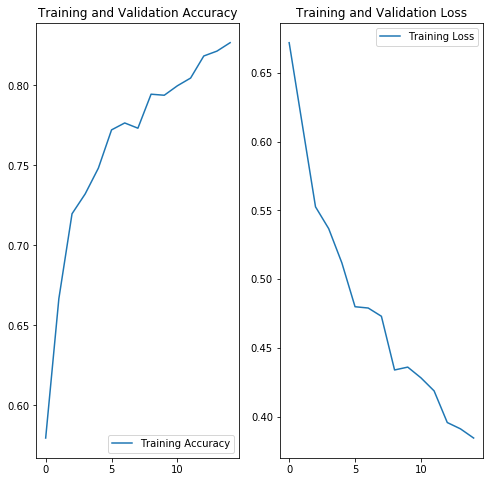

In [28]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()